# Random Variables Lab

### Introduction

In previous lessons, we learned about working with random variables.  Now imagine that we work at Duke University, where a number of students each year consider declaring for the NBA draft.  We have a student who is considering whether to declare, and would like us to do some analysis.  We are confident that if he declares for the draft, he will be drafted in the second round.  He wants us to give us a sense of how many years he can expect to play for in the NBA given that he is a second round draft pick.

### Loading our Data

Let's begin by loading our data.

In [14]:
import pandas as pd
url = "https://raw.githubusercontent.com/the-pudding/data/master/hype/players.csv"
players_df = pd.read_csv(url)

In [15]:
players_df[:3]

,name,link,rank,draft_year,draft_rd,draft_pk,college,recruit_year,bbrID,pick_overall,...,nba_mean_ws48_rank,nba_mean_vorp_rank,nba_mean_pipm_rank,nba_mean_wa_rank,top_mean_ws48_rank,top_mean_vorp_rank,top_mean_pipm_rank,top_mean_wa_rank,total_seasons,valid_seasons
0,Al Harrington,/players/h/harrial01.html,1.0,1998.0,1.0,25.0,NaN,1998.0,harrial01,25.0,...,134.363636,129.727273,122.181818,118.727273,109.6,114.0,86.8,79.8,16.0,11.0
1,Rashard Lewis,/players/l/lewisra02.html,2.0,1998.0,2.0,32.0,NaN,1998.0,lewisra02,32.0,...,55.916667,44.416667,56.083333,55.166667,32.4,21.8,19.4,18.2,16.0,12.0
2,Korleone Young,/players/y/youngko01.html,3.0,1998.0,2.0,40.0,NaN,1998.0,youngko01,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [16]:
players_df.shape

(1873, 30)

What we have is a dataframe consisting of 1800 drafted players.  Let's select some of the most relevant columns.

In [17]:
players_df.columns

Index(['name', 'link', 'rank', 'draft_year', 'draft_rd', 'draft_pk', 'college',
       'recruit_year', 'bbrID', 'pick_overall', 'pick_number', 'pick_round',
       'nba_mean_ws48', 'nba_mean_vorp', 'nba_mean_pipm', 'nba_mean_wa',
       'top_mean_ws48', 'top_mean_vorp', 'top_mean_pipm', 'top_mean_wa',
       'nba_mean_ws48_rank', 'nba_mean_vorp_rank', 'nba_mean_pipm_rank',
       'nba_mean_wa_rank', 'top_mean_ws48_rank', 'top_mean_vorp_rank',
       'top_mean_pipm_rank', 'top_mean_wa_rank', 'total_seasons',
       'valid_seasons'],
      dtype='object')

In [27]:
cols = ['name', 'draft_year', 'pick_round', 'total_seasons', 'valid_seasons']
selected_df = players_df[cols]

In [28]:
selected_df[:3]

,name,draft_year,pick_round,total_seasons,valid_seasons
0,Al Harrington,1998.0,1.0,16.0,11.0
1,Rashard Lewis,1998.0,2.0,16.0,12.0
2,Korleone Young,1998.0,2.0,1.0,0.0


OK, now that we've scoped down some of the columns, let's scope down some of the rows.  We only care about players picked in the second round, because that's the round our student will be drafted in.  And we only care about players drafted in 2005 or later.

In [32]:
selected_players = selected_df[(selected_df['draft_year'] > 2004) & (selected_df['pick_round'] == 2)]

In [33]:
selected_players.shape

(205, 5)

In [35]:
selected_players[:3]

,name,draft_year,pick_round,total_seasons,valid_seasons
222,Orien Greene,2005.0,2.0,6.0,0.0
317,James White,2006.0,2.0,7.0,0.0
323,Dijon Thompson,2005.0,2.0,2.0,0.0


In [36]:
selected_players['draft_year'].value_counts()

2011.0    24
2010.0    23
2013.0    22
2008.0    21
2007.0    20
2012.0    20
2014.0    19
2006.0    19
2005.0    19
2009.0    18
Name: draft_year, dtype: int64

Ok, so now we have the set of players drafted in the second round between 2005 and 2014.  Let's start by plotting a frequency distribution of the number of years that a player drafted in the second round played in the NBA.

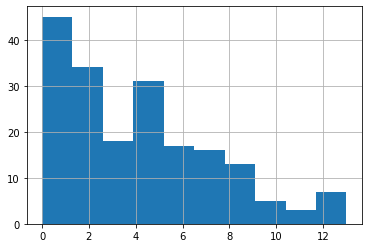

In [37]:
selected_players['total_seasons'].hist()

Next let's plot the probability density function for total leasons in the second round.

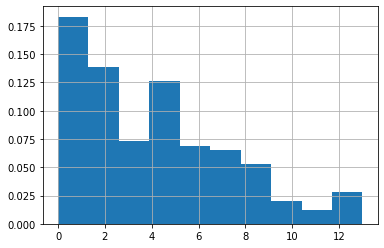

In [38]:
selected_players['total_seasons'].hist(density = True)

### Random Variables PDFs and CDFs

It's time we added a bit of formalism to our problem.

1. What is the lower bound of the sample space for our problem.

2. Is our sample space continuous or discrete?

3. Define a random variable $X$ to frame our problem

$X = $

Now, use the pandas to find the $P(X = 3)$

In [39]:
selected_players['total_seasons'].value_counts(normalize = True).loc[3]

# 0.0952

0.09523809523809523

Next use the pandas to find the $P(X \le 3)$

In [42]:
selected_players['total_seasons'].value_counts(normalize = True).sort_index().loc[:3].sum()

# 0.513

0.5132275132275133

### Summary

In this lesson we used data about NBA players to define a random variable $X$ that represented the number of years that a player drafted in the second round would play in the NBA.  Then we used that random variable's probability distribution function, and cumulative distribution function to find the probability that the player's career would be for exactly a certain number number of years, or less than a certain number of years.